<a href="https://colab.research.google.com/github/sonakshisharan/Machine_Learning/blob/main/Linear_Regression_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
df = pd.read_csv("Admission_Predict_A3.csv")

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Perform scaling using standard scaler

In [ ]:
scaler = StandardScaler()
columns_to_scale = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research"]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(df[columns_to_scale], df["Chance of Admit "], test_size=0.3,random_state=42)

In [ ]:
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
y_train_tensor=tf.constant(y_train.values.reshape(-1,1),dtype=tf.float32) # Reshape to (400, 1)
# print(f"{tf.shape(y_train_tensor)}")
tf.shape(X_train_tensor)
# print(f"{tf.shape(X_train_tensor)}")
X_test_tensor = tf.constant(X_test, dtype=tf.float32)
y_test_tensor=tf.constant(y_test.values.reshape(-1,1),dtype=tf.float32) # Reshape to (400, 1)

In [ ]:
# Initialize weights and bias as TensorFlow variables
weights = tf.Variable(tf.random.normal(shape=(X_train_tensor.shape[1], 1)))
bias = tf.Variable(tf.random.normal(shape=(1,)))

In [ ]:
def linear_regression(X):
  pred = tf.matmul(X, weights) + bias
  pred = tf.reshape(pred, (-1, 1))  # Reshape to match y_train_tensor shape
  return pred

# Define the mean squared error loss function
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training the linear regression model
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = linear_regression(X_train_tensor)
        loss = mean_squared_error(y_train_tensor, predictions)

    gradients = tape.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))


In [ ]:
# Evaluating the model
y_pred = linear_regression(X_test_tensor)
mse = mean_squared_error(y_test_tensor, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")
accuracy_scores.append(model.evaluate(X_test, y_test)[1])

# Calculate average accuracy
average_accuracy1 = sum(accuracy_scores) / len(accuracy_scores)
print(f"Accuracy on Test Data: {average_accuracy1}")
mse1=mse

Mean Squared Error on Test Data: 0.006204413715749979
5/5 [==============================] - 1s 5ms/step - loss: 2.2272 - accuracy: 0.0000e+00
Accuracy on Test Data: 0.854285717010498


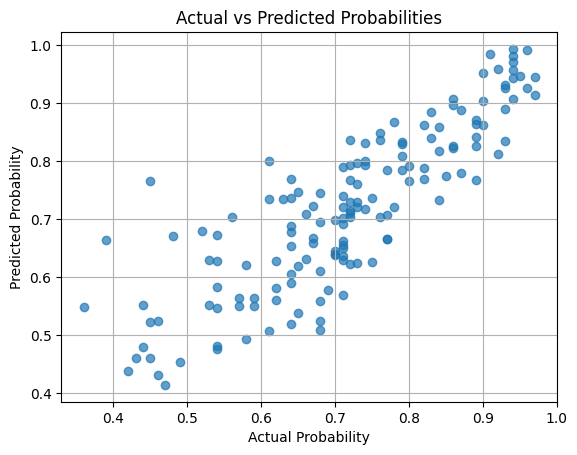

In [ ]:
# Plotting actual vs predicted probabilities
plt.scatter(y_test, y_pred.numpy(), alpha=0.7)
plt.xlabel("Actual Probability")
plt.ylabel("Predicted Probability")
plt.title("Actual vs Predicted Probabilities")
plt.grid(True)
plt.show()

In [ ]:
# Binning Process
bin_edges = [0.3, 0.5, 0.7, 1.0]
bin_labels = ['Low', 'Medium', 'High']
df['Admit Category'] = pd.cut(df['Chance of Admit '], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Encode categorical labels
label_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['Admit Category'] = df['Admit Category'].map(label_map)

# Split data into features and target
X = df.drop(['Serial No.', 'Chance of Admit ', 'Admit Category'], axis=1)
y = df['Admit Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Define logistic regression model
model = tf.keras.Sequential([ tf.keras.layers.Dense(3, activation='softmax')])  # 3 classes for 'Low', 'Medium', and 'High'

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
epochs = 50
losses = []
for epoch in range(epochs):
    loss = model.train_on_batch(X_train, y_train)
    losses.append(loss)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
accuracy=test_accuracy
loss=test_loss

Epoch 1/50, Loss: [1.7550355195999146, 0.1371428519487381]
Epoch 2/50, Loss: [1.7323863506317139, 0.14000000059604645]
Epoch 3/50, Loss: [1.7101616859436035, 0.1371428519487381]
Epoch 4/50, Loss: [1.6883615255355835, 0.14000000059604645]
Epoch 5/50, Loss: [1.6669853925704956, 0.14571428298950195]
Epoch 6/50, Loss: [1.6460330486297607, 0.15714286267757416]
Epoch 7/50, Loss: [1.6255033016204834, 0.16571427881717682]
Epoch 8/50, Loss: [1.6053946018218994, 0.17428570985794067]
Epoch 9/50, Loss: [1.5857049226760864, 0.18000000715255737]
Epoch 10/50, Loss: [1.5664315223693848, 0.18571428954601288]
Epoch 11/50, Loss: [1.5475720167160034, 0.18857142329216003]
Epoch 12/50, Loss: [1.529123067855835, 0.19428572058677673]
Epoch 13/50, Loss: [1.5110809803009033, 0.19428572058677673]
Epoch 14/50, Loss: [1.4934418201446533, 0.19428572058677673]
Epoch 15/50, Loss: [1.4762012958526611, 0.20000000298023224]
Epoch 16/50, Loss: [1.4593546390533447, 0.21142856776714325]
Epoch 17/50, Loss: [1.44289720058441

Softmax in Multiclass Classification:

Softmax is applied to the output layer's scores to normalize them into probabilities.

Each output neuron's probability represents the predicted likelihood of the input belonging to the corresponding class.

Softmax ensures a valid probability distribution where the sum of all class probabilities is 1.

It enables probabilistic interpretation and comparison of predicted class probabilities.

In [ ]:
scaler = StandardScaler()
columns_to_scale = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research"]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

X_train, X_test, y_train, y_test= train_test_split(df[columns_to_scale], df["Chance of Admit "], test_size=0.3,random_state=42)

X_train_tensor = tf.constant(X_train, dtype=tf.float32)
y_train_tensor=tf.constant(y_train.values.reshape(-1,1),dtype=tf.float32) # Reshape to (400, 1)
# print(f"{tf.shape(y_train_tensor)}")
tf.shape(X_train_tensor)
# print(f"{tf.shape(X_train_tensor)}")
X_test_tensor = tf.constant(X_test, dtype=tf.float32)
y_test_tensor=tf.constant(y_test.values.reshape(-1,1),dtype=tf.float32) # Reshape to (400, 1)

# Initialize weights and bias as TensorFlow variables
weights = tf.Variable(tf.random.normal(shape=(X_train_tensor.shape[1], 1)))
bias = tf.Variable(tf.random.normal(shape=(1,)))

In [ ]:
def linear_regression(X):
  pred = tf.matmul(X, weights) + bias
  pred = tf.reshape(pred, (-1, 1))  # Reshape to match y_train_tensor shape
  return pred

# Define the mean squared error loss function
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training the linear regression model
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = linear_regression(X_train_tensor)
        loss = mean_squared_error(y_train_tensor, predictions)

    gradients = tape.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))


In [ ]:
# Evaluating the model
y_pred = linear_regression(X_test_tensor)
mse = mean_squared_error(y_test_tensor, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")
accuracy_scores.append(model.evaluate(X_test, y_test)[1])

# Calculate average accuracy
average_accuracy1 = sum(accuracy_scores) / len(accuracy_scores)
print(f"Accuracy on Test Data: {average_accuracy1}")
mse1=mse

Mean Squared Error on Test Data: 0.5369917750358582
5/5 [==============================] - 1s 9ms/step - loss: 1.4045 - accuracy: 0.0000e+00
Accuracy on Test Data: 0.7475000023841858


Lower Accuracy when learning rate is decreased to 0.001

In [ ]:
def linear_regression(X):
  pred = tf.matmul(X, weights) + bias
  pred = tf.reshape(pred, (-1, 1))  # Reshape to match y_train_tensor shape
  return pred

# Define the mean squared error loss function
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.001)

# Training the linear regression model
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = linear_regression(X_train_tensor)
        loss = mean_squared_error(y_train_tensor, predictions)

    gradients = tape.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

    # Evaluating the model
y_pred = linear_regression(X_test_tensor)
mse = mean_squared_error(y_test_tensor, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")
accuracy_scores.append(model.evaluate(X_test, y_test)[1])

# Calculate average accuracy
average_accuracy1 = sum(accuracy_scores) / len(accuracy_scores)
print(f"Accuracy on Test Data: {average_accuracy1}")
mse1=mse


Mean Squared Error on Test Data: 0.00363421649672091
5/5 [==============================] - 0s 3ms/step - loss: 1.4045 - accuracy: 0.0000e+00
Accuracy on Test Data: 0.6644444465637207


Losses and mse are significantly high for a low value of learning parameter (0.0001)

In [ ]:
def linear_regression(X):
    return tf.matmul(X, weights) + bias

# Define the mean squared error loss function
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

optimizer = tf.optimizers.SGD(learning_rate=0.0001)

# Training the linear regression model
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = linear_regression(X_train_tensor)
        loss = mean_squared_error(y_train_tensor, predictions)
    gradients = tape.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

# Evaluating the model
y_pred = linear_regression(X_train_tensor)
mse = mean_squared_error(y_train_tensor, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

Mean Squared Error on Test Data: 0.003536572214215994


<ipython-input-316-3b8eb9b2b668>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()["Chance of Admit "].drop({"Chance of Admit ","Serial No."})


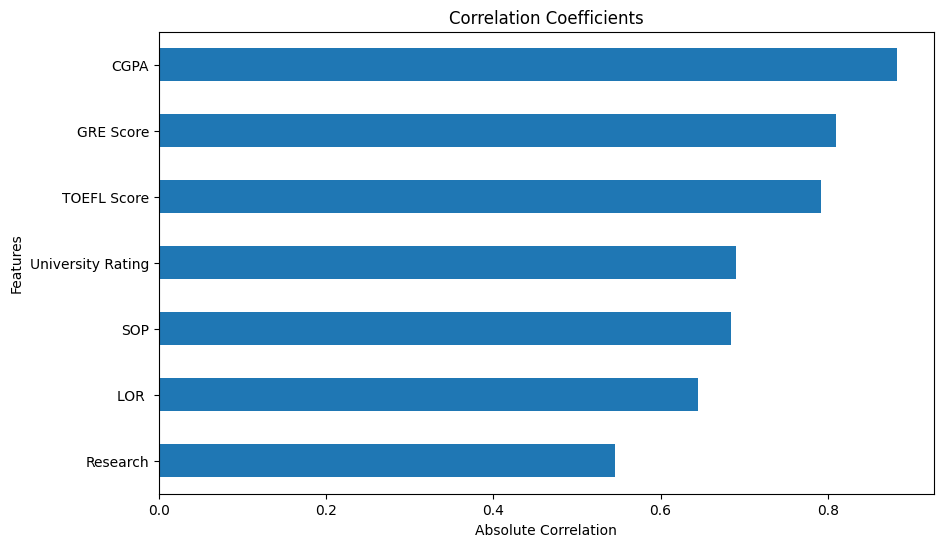

In [ ]:
# Calculate correlation coefficients
correlation = df.corr()["Chance of Admit "].drop({"Chance of Admit ","Serial No."})

# Visualize significant contributions of each feature
plt.figure(figsize=(10, 6))
correlation.abs().sort_values().plot(kind='barh')
plt.title("Correlation Coefficients")
plt.xlabel("Absolute Correlation")
plt.ylabel("Features")
plt.show()



In [ ]:
selector = {'CGPA', 'GRE Score', 'TOEFL Score'}

In [ ]:
X = df[selector]
y = df['Chance of Admit ']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_tensor = tf.constant(X_train, dtype=tf.float32)
y_train_tensor=tf.constant(y_train.values.reshape(-1,1),dtype=tf.float32) # Reshape to (400, 1)
# print(f"{tf.shape(y_train_tensor)}")
tf.shape(X_train_tensor)
# print(f"{tf.shape(X_train_tensor)}")
X_test_tensor = tf.constant(X_test, dtype=tf.float32)
y_test_tensor=tf.constant(y_test.values.reshape(-1,1),dtype=tf.float32) # Reshape to (400, 1)

weights = tf.Variable(tf.random.normal(shape=(X_train_tensor.shape[1], 1)))
bias = tf.Variable(tf.random.normal(shape=(1,)))

# Define the optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training the linear regression model
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = linear_regression(X_train_tensor)
        loss = mean_squared_error(y_train_tensor, predictions)

    gradients = tape.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

# Evaluating the model
y_pred = linear_regression(X_test_tensor)
mse = mean_squared_error(y_test_tensor, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")
mse2=mse

if mse1 > mse2:
    print("Performance improved after feature selection.")
elif mse1 == mse2:
    print("Performance remained consistent after feature selection.")
else:
    print("Performance declined after feature selection.")

Mean Squared Error on Test Data: 0.0043416996486485004
Performance declined after feature selection.


In [ ]:
# Import necessary libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the dataset (X, y)
X=df[columns_to_scale]
y=df['Chance of Admit ']

y = pd.Categorical(y).codes

# Split the data into k folds
kf = KFold(n_splits=5)

In [ ]:
# Initialize lists to store results
linear_regression_scores = []
logistic_regression_scores = []



# Iterate through each fold
for train_index, test_index in kf.split(X):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y = pd.Series(y)
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate linear regression
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)
    linear_regression_scores.append(linear_regression.score(X_test, y_test))


    # Train and evaluate logistic regression
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train, y_train)
    logistic_regression_scores.append(logistic_regression.score(X_test, y_test))

In [ ]:
# Calculate average scores
average_linear_regression_score = sum(linear_regression_scores) / len(linear_regression_scores)
average_logistic_regression_score = sum(logistic_regression_scores) / len(logistic_regression_scores)

# Print results
print("Average Linear Regression Score:", average_linear_regression_score)
print("Average Logistic Regression Score:", average_logistic_regression_score)

# Compare the average scores to determine the more effective model

Average Linear Regression Score: 0.8137363666462349
Average Logistic Regression Score: 0.076


In [ ]:
# Define the dataset (X, y)

# Convert target variable to binary values
y_binary = tf.cast(y > 0.5, tf.float32)

# Define the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X.shape[1],))])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Perform k-fold cross-validation
kf = KFold(n_splits=5)
accuracy_scores = []

for train_index, test_index in kf.split(X):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]

    # Convert y_binary to NumPy arrays
    y_train = y_binary.numpy()[train_index]
    y_test = y_binary.numpy()[test_index]

    # Train the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    # Evaluate the model on the test set
    accuracy_scores.append(model.evaluate(X_test, y_test)[1])

# Calculate average accuracy
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Accuracy with Logistic Regression : {average_accuracy}")
print(f"Accuracy with Linear Regression : {average_accuracy1}")


# Compare accuracy with linear regression model
# (Assuming you have already calculated the average accuracy for the linear regression model)
if average_accuracy > average_accuracy1:
    print("Logistic regression model is better.")
else:
    print("Linear regression model is better.")


4/4 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 1.0000
Accuracy with Logistic Regression : 0.9960000038146972
Accuracy with Linear Regression : 0.6644444465637207
Logistic regression model is better.


for epochs=1000 (hyperparameter change)

In [ ]:
# Define the dataset (X, y)

# Convert target variable to binary values
y_binary = tf.cast(y > 0.5, tf.float32)

# Define the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X.shape[1],))])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Perform k-fold cross-validation
kf = KFold(n_splits=5)
accuracy_scores = []

for train_index, test_index in kf.split(X):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]

    # Convert y_binary to NumPy arrays
    y_train = y_binary.numpy()[train_index]
    y_test = y_binary.numpy()[test_index]

    # Train the model
    model.fit(X_train, y_train, epochs=1000, verbose=0)

    # Evaluate the model on the test set
    accuracy_scores.append(model.evaluate(X_test, y_test)[1])

# Calculate average accuracy
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Accuracy with Logistic Regression : {average_accuracy}")
print(f"Accuracy with Linear Regression : {average_accuracy1}")


# Compare accuracy with linear regression model
# (Assuming you have already calculated the average accuracy for the linear regression model)
if average_accuracy > average_accuracy1:
    print("Logistic regression model is better.")
else:
    print("Linear regression model is better.")


4/4 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000
